## Import

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree
import scipy
import awkward
import numpy as np
import time
import math
from sklearn import metrics
import matplotlib.pyplot as plt

sys.path.append('/afs/desy.de/user/l/lbenato/cms-lpc-llp_repo/run3_muon_system_analysis/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
from helper_functions import deltaR, deltaPhi, drawCMS

rt.gStyle.SetOptStat(0)
rt.gROOT.SetBatch(True)

Welcome to JupyROOT 6.24/06


## Load ntuples

## Load variables

In [2]:
fpath =OrderedDict()
tree = OrderedDict()

start_t = time.time()
data_year = 2022

tag  = 'V1p19'
vers = 'v6'
#v1 includes events without selections
#v3 includes events with at least 2 clusters
#v4: no event level cuts, clusters made with DBSCAN, HLT time definition
#v5: no event level cuts, clusters made with CA

data_path = '/nfs/dust/cms/group/cms-llp/muon_system_run3/'+tag+'/Data'+str(data_year)+'/'+vers+'/'
lumi = 23.02*1000

if data_year == 2022:
    fpath['data'] = data_path + 'DisplacedJet-EXOCSCCluster_Run2022EFG-PromptReco-v1_goodLumi.root'
    fpath['signal'] = data_path + 'ggH_HToSSTobbbb_MH-125_MS-15_CTau1000_13p6TeV_1pb_weighted.root'

    
data_label = {}
marker_style = {}
line_style = {}
colors = {}
data_label['data'] = 'DBSCAN data'#'CA data'
data_label['signal'] = 'DBSCAN signal'#'CA signal 0.6'
marker_style['data'] = 20
marker_style['signal'] = 20
line_style['data'] = 1
line_style['signal'] = 2
colors['data'] = 1
colors['signal'] = 2

    
NEvents = {}
for k,v in fpath.items():
    root_dir = uproot.open(v)
    tree[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    a = tree[k]["weight"].array()
    
for k, T in tree.items():
    branch_names = T.keys()

In [3]:
JET_PT_CUT = 10.0
MUON_PT_CUT = 20.0
N_RECHIT_CUT = 90
jetPt_cut = 50
tightid = False
ring_cut = 50

#cut_based = True
#cut_based_version = 'v4'

intime = True
DPHI_CUT = 1


gLLP_csc = {}


selections_cluster = {}
sel_cluster = {}
sel_jetveto_csc = {}
sel_muonveto_csc = {}
sel_jetveto_dt = {}
sel_muonveto_dt = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
gLLP_ctau = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
nCscRings = {}
nDtRings = {}

weight = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
nRechits_sr = {}
jetMet_dPhiMin30_sr = {}
cscClusterTimeSpread = {}
bdt_score = {}
nCscChambers = {}

sel_ev = {}
hlt_sel_ev = {}
cluster_index = ''
nRings = {}

#CSC cluster variables
cscClusterMuonVetoPt = {}
cscClusterJetVetoPt = {}
cscClusterPhi = {}
cscClusterEta = {}
cscClusterEta2 = {}
cscClusterEta3 = {}
cscClusterR = {}
cscClusterZ = {}
cscClusterSize = {}
cscClusterSize2 = {}
cscClusterSize3 = {}
cscClusterTimeSpread = {}
cscClusterTime = {}
cscClusterTime2 = {}
cscClusterTime3 = {}

cscClusterNStation = {}
cscClusterDphi = {}
cscClusterMet_dPhi = {}
nCscClusters = {}

#Study trigger categories:
cscClusterTimeTr1 = {}
cscClusterTimeTr2 = {}
cscClusterTimeTr3 = {}
cscClusterEtaTr1 = {}
cscClusterEtaTr2 = {}
cscClusterEtaTr3 = {}
cscClusterNStationTr1 = {}
cscClusterNStationTr2 = {}
cscClusterNStationTr3 = {}
cscClusterSizeTr1 = {}
cscClusterSizeTr2 = {}
cscClusterSizeTr3 = {}

#DT cluster variables
dtClusterMuonVetoPt = {}
dtClusterJetVetoPt = {}
dtClusterTime = {}
dtClusterPhi = {}
dtClusterEta = {}
dtClusterSize = {}
dtClusterDphi = {}
nDtClusters = {}
dtClusterNStation = {}
dtClusterMaxStation = {}
dtClusterNHitStation1 = {}
dtCluster_match_MB1hits_0p4 = {}
dtCluster_match_MB1hits_0p5 = {}
dtClusterMet_dPhi = {}


deltaEta = {}        
deltaRCluster = {}

#Gen matching
cscCluster_match_gLLP = {}
cscCluster_match_gLLP_csc = {}
cscCluster_match_gLLP_minDeltaR = {}
dtCluster_match_gLLP = {}
dtCluster_match_gLLP_dt = {}
dtCluster_match_gLLP_minDeltaR = {}

#L1 plateau
first_in_ME11 = {}
first_in_ME12 = {}
first_in_ME13 = {}
first_in_ME21 = {}
first_in_ME22 = {}
first_in_ME31 = {}
first_in_ME32 = {}
first_in_ME41 = {}
first_in_ME42 = {}

first_in_plateau_ME11 = {}
first_in_plateau_ME12 = {}
first_in_plateau_ME13 = {}
first_in_plateau_ME21 = {}
first_in_plateau_ME22 = {}
first_in_plateau_ME31 = {}
first_in_plateau_ME32 = {}
first_in_plateau_ME41 = {}
first_in_plateau_ME42 = {}
first_in_plateau = {}

metPhi = {}
evtNum = {}
runNum = {}
lumiNum = {}

nMe11 = {}

tree_keys = []
nClusterRatio = {}


## Settings

In [4]:
category = 0#-1#0
category = 2

#-1: at least 1csc
#0: exactly 1 csc
#1: exactly 2csc,
#2: 1csc+1dt, 

do_jet_veto = False
do_inverted_jet_veto = False
if (do_jet_veto and do_inverted_jet_veto):
    print("Please check jet veto! Aborting...")
    exit()

do_muon_veto = False
do_inverted_muon_veto = False
if (do_muon_veto and do_inverted_muon_veto):
    print("Please check muon veto! Aborting...")
    exit()

do_csc_time_spread_cut = False
do_csc_in_time_cut = False
do_ME_veto = True
do_MB_veto = True
do_HLT_eta_cut = False#True

plot_string = ""
#plot_string = "_jet_veto"
#plot_string = "_csc_time_spread_cut"
#plot_string = "_csc_in_time_cut"
#plot_string = ""
#plot_string = "_ME_veto"
#plot_string = "_ME_veto_HLT_eta_cut"
#plot_string = "_ME_veto_HLT_eta_cut_at_least_1_cluster"
#plot_string = "_ME_veto_HLT_eta_cut_in_time_cut_at_least_1_cluster"
#plot_string+= "_exactly_1_csc_cluster"

#plot_string+= "_exactly_1_csc_cluster_ME_veto"
#plot_string+= "_2_csc_clusters_ME_veto"
#plot_string+= "_at_least_1_csc_cluster_ME_veto"
#plot_string+= "_csc_dt_cluster_ME_veto"


plot_string+= "_csc_dt_cluster_ME_MB_veto"
#plot_string+= "_exactly_2_csc_clusters_ME_veto"

In [5]:
for a in branch_names:
    if "dPhi" in str(a):
        print(a)
    #if "met" in str(a):
    #    print(a)

b'cscRechitClusterMet_dPhi'
b'dtRechitClusterMet_dPhi'
b'dtRechitCluster_match_RPChits_dPhi0p5'
b'dtRechitCluster_match_RPCBx_dPhi0p5'
b'dtRechitCluster_match_RB1_dPhi0p5'


In [6]:
for k, T in tree.items():
    tree_keys.append(k)
    #if not k == 'data' and not k[-4:] == '1000':continue
########### SELECTION: CLUSTERS ############
    jet_veto_csc = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')<30
    muon_veto_csc = np.logical_not(np.logical_and(T.array('cscRechitClusterMuonVetoPt') >= 30, T.array('cscRechitClusterMuonVetoGlobal')))
    
    sel_csccluster = T.array('cscRechitClusterSize') >= 0
    
    if do_jet_veto:
        sel_csccluster = jet_veto_csc
    if do_inverted_jet_veto:
        sel_csccluster = np.logical_not(jet_veto_csc)       

    if do_muon_veto:
        sel_csccluster = np.logical_and(sel_csccluster, muon_veto_csc)
    if do_inverted_muon_veto:
        sel_csccluster = np.logical_and(sel_csccluster, np.logical_not(muon_veto_csc))    
        

    
    #Missing branch:
    #sel_csccluster = np.logical_and(sel_csccluster, np.abs(T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi'))<1.2)

    #Missing branch:
    #sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')<1)

    #Time spread cut
    if do_csc_time_spread_cut:
        sel_csccluster = np.logical_and(sel_csccluster, T.array('cscRechitCluster' + cluster_index + 'TimeSpread')<20)
    
    #Time cut
    if do_csc_in_time_cut:
        sel_csccluster = np.logical_and(sel_csccluster, np.logical_and(
            T.array('cscRechitCluster' + cluster_index + 'Time')< 12.5, 
            T.array('cscRechitCluster' + cluster_index + 'Time') > -5))

    #ME11 and ME12 veto
    ME11_veto = np.logical_and(
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11')==0  ,
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11')==0
    )  

    ME12_veto = np.logical_and(
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus12')==0  ,
        T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus12')==0
    )      

    
    
    
    
    #Try to understand if some categories have a different resolution in time
    #Trigger cat1
    sel_trgCluster_tr1 = np.logical_and( T.array('cscRechitClusterSize') >= 100, np.logical_and(T.array('cscRechitClusterNStation10')>=2, np.abs(T.array('cscRechitClusterEta'))<1.9))
    #Trigger cat2
    sel_trgCluster_tr2 = np.logical_and( T.array('cscRechitClusterSize') >= 200, np.logical_and(T.array('cscRechitClusterNStation10')==1, np.abs(T.array('cscRechitClusterEta'))<1.9))
    #Trigger cat3    
    sel_trgCluster_tr3 = np.logical_and( T.array('cscRechitClusterSize') >= 500, np.abs(T.array('cscRechitClusterEta'))>=1.9)
    
    sel_trgCluster = np.logical_and( T.array('cscRechitClusterSize') >= 100, np.logical_and(T.array('cscRechitClusterNStation10')>=2, np.abs(T.array('cscRechitClusterEta'))<1.9))
    sel_trgCluster =np.logical_or(sel_trgCluster, np.logical_and( T.array('cscRechitClusterSize') >= 200, np.logical_and(T.array('cscRechitClusterNStation10')==1, np.abs(T.array('cscRechitClusterEta'))<1.9)))
    sel_trgCluster =np.logical_or(sel_trgCluster, np.logical_and( T.array('cscRechitClusterSize') >= 500, np.abs(T.array('cscRechitClusterEta'))>=1.9))
    
    
    if do_ME_veto:
        sel_csccluster = np.logical_and(sel_csccluster,
                                    np.logical_and(ME11_veto,ME12_veto)
                                   ) 
    if do_HLT_eta_cut:
        sel_csccluster = np.logical_and(sel_csccluster,sel_trgCluster)

        
        
    sel_dtcluster = T.array('dtRechitClusterSize') >= 0
    #Missing branch:
    #sel_dtcluster = np.abs(T.array('dtRechitClusterMetEENoise_dPhi')) < 1
    jet_veto_dt = np.abs(T.array('dtRechitClusterJetVetoPt')) < 50
    muon_veto_dt = np.logical_not(np.logical_and(T.array('dtRechitClusterMuonVetoPt') >= 10, T.array('dtRechitClusterMuonVetoLooseId')))
    if do_muon_veto:
        sel_dtcluster = np.logical_and(sel_dtcluster, muon_veto_dt)
    if do_jet_veto:
        sel_dtcluster = np.logical_and(sel_dtcluster, jet_veto_dt)

    MB1_veto = T.array('dtRechitClusterNHitStation1') == 0
    if do_MB_veto:
        sel_dtcluster = np.logical_and(sel_dtcluster, MB1_veto)
        
    #Check with Christina:
    #These selections ensure there are no clusters with hits in 4 DT stations to reduce muon background
    #MB1 veto was not applied in Run2 double tag
    #But we apply it now since it's present at HLT --> no need to implement this on top
    '''
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_not(np.logical_and(T.array('dtRechitClusterMaxStation')==1, T.array('dtRechitClusterMaxStationRatio')>0.9)))
    cut = 5
    station = (T.array('dtRechitClusterNSegStation1')>cut).astype(int)+(T.array('dtRechitClusterNSegStation2')>cut).astype(int)\
+(T.array('dtRechitClusterNSegStation3')>cut).astype(int)+(T.array('dtRechitClusterNSegStation4')>cut).astype(int)

    max_station = np.maximum(np.maximum(np.maximum(T.array('dtRechitClusterNSegStation1'), T.array('dtRechitClusterNSegStation2')), T.array('dtRechitClusterNSegStation3')), T.array('dtRechitClusterNSegStation4'))
    min_station = np.minimum(np.minimum(np.minimum(T.array('dtRechitClusterNSegStation1'), T.array('dtRechitClusterNSegStation2')), T.array('dtRechitClusterNSegStation3')), T.array('dtRechitClusterNSegStation4'))
    sel_dtcluster = np.logical_and(sel_dtcluster, np.logical_or(station<4, min_station/max_station<0.4))
    '''
    
    #print(max_station)
    #print(sel_dtcluster)
    
    
########### SELECTION: JETS ############
    
    sel_jet = np.logical_and(T.array('jetPt') > jetPt_cut, np.abs(T.array('jetEta')) < 2.4 )

########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()    
    #HLT_CaloMET60_DTCluster50 = hlt[:,562]
    #HLT_CaloMET60_DTClusterNoMB1S50 = hlt[:,563]
    #HLT_L1MET_DTCluster50 = hlt[:,564]
    #HLT_L1MET_DTClusterNoMB1S50 = hlt[:,565]
    HLT_CscCluster_Loose = hlt[:,566]
    HLT_CscCluster_Medium = hlt[:,567]
    HLT_CscCluster_Tight = hlt[:,568]
    HLT_L1CSCShower_DTCluster50 = hlt[:,569]
    HLT_L1CSCShower_DTCluster75 = hlt[:,570]

    #Or of the triggers: starting with the CSC ones
    #hlt_sel_ev[k] = np.logical_or(HLT_CscCluster_Loose,np.logical_or(HLT_CscCluster_Medium,HLT_CscCluster_Tight))
    if category==2:
        hlt_sel_ev[k] = HLT_L1CSCShower_DTCluster50
    else:
        hlt_sel_ev[k] = HLT_CscCluster_Loose

    #sel_ev[k]  = np.logical_and(sel_ev[k], T.array('category') == 0)
    #sel_ev[k] = np.logical_and(sel_ev[k], (T.array('nDtRings')+T.array('nCscRings'))<10)
    #sel_ev[k] = np.logical_and(sel_ev[k] ,T.array('metEENoise') > 200)
    sel_ev[k] = T.array('nLeptons') == 0
    
    #If trigger:
    #We don't have correct trigger emulation in signal at the moment
    if k == 'data': sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    if k == 'data': sel_ev[k] = np.logical_and(sel_ev[k], T.array('runNum')>=360019)
    
    ##print("Events passing so far: ", sel_ev[k].sum())
    #sel_ev[k] = np.logical_and(sel_ev[k] , sel_jet.sum()>=1)
    #sel_ev[k] = np.logical_and(sel_ev[k],T.array('Flag2_all'))
    ##print("Events passing so far: ", sel_ev[k].sum())
    



    if category == 0:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
        #Adding this to avoid overlaps as a starting point
#         sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 0)
    elif category == 1:
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 2)
        hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    elif category == 2:      
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() == 1)
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_dtcluster.sum() == 1)
        hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])
    elif category == -1:      
        sel_ev[k]  = np.logical_and(sel_ev[k],sel_csccluster.sum() >= 1)
        hlt_sel_ev[k] = np.logical_and(sel_ev[k],hlt_sel_ev[k])       
    #break
########### BRANCHES ############
    ##### event variables #####
    #gLLP_beta[k] = T.array('gLLP_beta')[sel_ev[k]]

    if category == 0 or category==-1 or category==1:
        cscClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterTimeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,:]
        #cscRechitClusterDphi1[k] =  T.array('cscRechitCluster' + cluster_index + 'MetEENoise_dPhi')[sel_csccluster][sel_ev[k]][:,:]
        #cscRechitClusterMe11Ratio[k] =  T.array('cscRechitCluster' + cluster_index + 'Me11Ratio')[sel_csccluster][sel_ev[k]]  
        cscClusterSize2[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 1)  ][:,:]
        cscClusterTime2[k] =  T.array('cscRechitCluster' + cluster_index + 'Time')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 1)  ][:,:]
        cscClusterEta2[k] =  T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 1)  ][:,:]
        
        cscClusterSize3[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 2)  ][:,:]
        cscClusterTime3[k] =  T.array('cscRechitCluster' + cluster_index + 'Time')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 2)  ][:,:]
        cscClusterEta3[k] =  T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][ np.logical_and(sel_ev[k],sel_csccluster.sum() > 2)  ][:,:]

        cscClusterR[k] = np.sqrt(  T.array('cscRechitCluster' + cluster_index + 'X')[sel_csccluster][sel_ev[k]][:,:]**2 + T.array('cscRechitCluster' + cluster_index + 'Y')[sel_csccluster][sel_ev[k]][:,:]**2 )
        cscClusterZ[k] = T.array('cscRechitCluster' + cluster_index + 'Z')[sel_csccluster][sel_ev[k]][:,:]        
        
        cscClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_csccluster][sel_ev[k]][:,:]
        
        cscClusterMet_dPhi[k] = T.array('cscRechitClusterMet_dPhi')[sel_csccluster][sel_ev[k]][:,:]
        
        cscCluster_match_gLLP[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP')[sel_csccluster][sel_ev[k]][:,:]
        cscCluster_match_gLLP_minDeltaR[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_minDeltaR')[sel_csccluster][sel_ev[k]][:,:]
        cscCluster_match_gLLP_csc[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc')[sel_csccluster][sel_ev[k]][:,:]
        
        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        nDtClusters[k] = sel_dtcluster.sum()[sel_ev[k]]

        
        sel_jetveto_csc[k] = jet_veto_csc[sel_csccluster][sel_ev[k]][:,:]
        sel_muonveto_csc[k] = muon_veto_csc[sel_csccluster][sel_ev[k]][:,:]
        
        hlt_sel_ev[k] = hlt_sel_ev[k][ sel_ev[k] ]
        met[k] = T.array('met')[ sel_ev[k] ]
        sel_ev[k] = sel_ev[k][ sel_ev[k] ]        

    elif category == 2:
        dtClusterMuonVetoPt[k] = T.array('dtRechitClusterMuonVetoPt')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterJetVetoPt[k] = T.array('dtRechitClusterJetVetoPt')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterPhi[k] = T.array('dtRechitClusterPhi')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterEta[k] = T.array('dtRechitClusterEta')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterSize[k] =  T.array('dtRechitClusterSize')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterTime[k] =  T.array('dtRechitCluster_match_RPCBx_dPhi0p5')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterNStation[k] =  T.array('dtRechitClusterNStation10')[sel_dtcluster][sel_ev[k]][:,:]
        dtClusterNHitStation1[k] = T.array('dtRechitClusterNHitStation1')[sel_dtcluster][sel_ev[k]][:,:]
        dtCluster_match_MB1hits_0p4[k] = T.array('dtRechitCluster_match_MB1hits_0p4')[sel_dtcluster][sel_ev[k]][:,:]
        dtCluster_match_MB1hits_0p5[k] = T.array('dtRechitCluster_match_MB1hits_0p5')[sel_dtcluster][sel_ev[k]][:,:]
        
        dtClusterMet_dPhi[k] = T.array('dtRechitClusterMet_dPhi')[sel_dtcluster][sel_ev[k]][:,:]
        
        
        dtCluster_match_gLLP_minDeltaR[k] = T.array('dtRechitCluster' + cluster_index + '_match_gLLP_minDeltaR')[sel_dtcluster][sel_ev[k]][:,:]
        dtCluster_match_gLLP_dt[k] = T.array('dtRechitCluster' + cluster_index + '_match_gLLP_dt')[sel_dtcluster][sel_ev[k]][:,:]
        dtCluster_match_gLLP[k] = T.array('dtRechitCluster' + cluster_index + '_match_gLLP')[sel_dtcluster][sel_ev[k]][:,:]

        
        cscClusterMet_dPhi[k] = T.array('cscRechitClusterMet_dPhi')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterMuonVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'MuonVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterJetVetoPt[k] = T.array('cscRechitCluster' + cluster_index + 'JetVetoPt')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterPhi[k] = T.array('cscRechitCluster' + cluster_index + 'Phi')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterEta[k] = T.array('cscRechitCluster' + cluster_index + 'Eta')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterR[k] = np.sqrt(  T.array('cscRechitCluster' + cluster_index + 'X')[sel_csccluster][sel_ev[k]][:,:]**2 + T.array('cscRechitCluster' + cluster_index + 'Y')[sel_csccluster][sel_ev[k]][:,:]**2 )
        cscClusterZ[k] = T.array('cscRechitCluster' + cluster_index + 'Z')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterSize[k] =  T.array('cscRechitCluster' + cluster_index + 'Size')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterTimeSpread[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeSpreadWeightedAll')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterTime[k] =  T.array('cscRechitCluster' + cluster_index + 'TimeWeighted')[sel_csccluster][sel_ev[k]][:,:]
        cscClusterNStation[k] =  T.array('cscRechitCluster' + cluster_index + 'NStation10')[sel_csccluster][sel_ev[k]][:,:]

        cscCluster_match_gLLP[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP')[sel_csccluster][sel_ev[k]][:,:]
        cscCluster_match_gLLP_minDeltaR[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_minDeltaR')[sel_csccluster][sel_ev[k]][:,:]
        cscCluster_match_gLLP_csc[k] = T.array('cscRechitCluster' + cluster_index + '_match_gLLP_csc')[sel_csccluster][sel_ev[k]][:,:]
       
        nCscClusters[k] = sel_csccluster.sum()[sel_ev[k]]
        nDtClusters[k] = sel_dtcluster.sum()[sel_ev[k]]
        
        
        
        
        sel_jetveto_csc[k] = jet_veto_csc[sel_csccluster][sel_ev[k]][:,:]
        sel_muonveto_csc[k] = muon_veto_csc[sel_csccluster][sel_ev[k]][:,:]
        
        sel_jetveto_dt[k] = jet_veto_dt[sel_dtcluster][sel_ev[k]][:,:]
        sel_muonveto_dt[k] = muon_veto_dt[sel_dtcluster][sel_ev[k]][:,:]        
        #This gives some errors...
        #nMe11[k] = T.array('cscRechitCluster' + cluster_index + 'NRechitChamberPlus11')[sel_csccluster][sel_ev[k]][:,0]+T.array('cscRechitCluster' + cluster_index + 'NRechitChamberMinus11')[sel_csccluster][sel_ev[k]][:,0]

        #To be fixed, some issues with deltaPhi function
        #deltaRCluster[k] = deltaR(dtRechitClusterEta[k], dtRechitClusterPhi[k],cscRechitClusterEta[k], cscRechitClusterPhi[k])
        #deltaEta[k] = dtRechitClusterEta[k]-cscRechitClusterEta[k]

        dtClusterMaxStation[k] = T.array('dtRechitClusterMaxStation')[sel_dtcluster][sel_ev[k]]
        
        hlt_sel_ev[k] = hlt_sel_ev[k][ sel_ev[k] ]
        met[k] = T.array('met')[ sel_ev[k] ]
        sel_ev[k] = sel_ev[k][ sel_ev[k] ]

    nClusterRatio[k] = np.divide(nCscClusters[k].astype(float),nDtClusters[k].astype(float),out=np.zeros_like(nDtClusters[k].astype(float)),where=(nDtClusters[k].astype(float) != 0))



# L1 and HLT plateau

In [7]:
first_in_ME11 = {}
first_in_ME12 = {}
first_in_ME13 = {}
first_in_ME21 = {}
first_in_ME22 = {}
first_in_ME31 = {}
first_in_ME32 = {}
first_in_ME41 = {}
first_in_ME42 = {}

first_in_plateau_ME11 = {}
first_in_plateau_ME12 = {}
first_in_plateau_ME13 = {}
first_in_plateau_ME21 = {}
first_in_plateau_ME22 = {}
first_in_plateau_ME31 = {}
first_in_plateau_ME32 = {}
first_in_plateau_ME41 = {}
first_in_plateau_ME42 = {}
first_in_plateau = {}

blind_cluster_2_size = {}
blind_cluster_2_time = {}

gen_match = {}

for k in tree_keys:
    #First cluster specific    
    first_in_ME11[k] = (cscClusterR[k][:,0]>100)&(cscClusterR[k][:,0]<275) &(abs(cscClusterZ[k][:,0])>580)&(abs(cscClusterZ[k][:,0])<632) 
    first_in_ME12[k] = (cscClusterR[k][:,0]>275)&(cscClusterR[k][:,0]<465) &(abs(cscClusterZ[k][:,0])>668)&(abs(cscClusterZ[k][:,0])<724)
    first_in_ME13[k] = (cscClusterR[k][:,0]>505)&(cscClusterR[k][:,0]<700) &(abs(cscClusterZ[k][:,0])>668)&(abs(cscClusterZ[k][:,0])<724)

    first_in_ME21[k] = (cscClusterR[k][:,0]>139)&(cscClusterR[k][:,0]<345) &(abs(cscClusterZ[k][:,0])>789)&(abs(cscClusterZ[k][:,0])<850)
    first_in_ME22[k] = (cscClusterR[k][:,0]>357)&(cscClusterR[k][:,0]<700) &(abs(cscClusterZ[k][:,0])>791)&(abs(cscClusterZ[k][:,0])<850)

    first_in_ME31[k] = (cscClusterR[k][:,0]>160)&(cscClusterR[k][:,0]<345) &(abs(cscClusterZ[k][:,0])>915)&(abs(cscClusterZ[k][:,0])<970)
    first_in_ME32[k] = (cscClusterR[k][:,0]>357)&(cscClusterR[k][:,0]<700) &(abs(cscClusterZ[k][:,0])>911)&(abs(cscClusterZ[k][:,0])<970)

    first_in_ME41[k] = (cscClusterR[k][:,0]>178)&(cscClusterR[k][:,0]<345) &(abs(cscClusterZ[k][:,0])>1002)&(abs(cscClusterZ[k][:,0])<1063)
    first_in_ME42[k] = (cscClusterR[k][:,0]>357)&(cscClusterR[k][:,0]<700) &(abs(cscClusterZ[k][:,0])>1002)&(abs(cscClusterZ[k][:,0])<1063)
    
    first_in_plateau_ME11[k] = first_in_ME11[k] & (cscClusterSize[k][:,0]>=500)
    first_in_plateau_ME21[k] = first_in_ME21[k] & (cscClusterSize[k][:,0]>=500)
    first_in_plateau_ME31[k] = first_in_ME31[k] & (cscClusterSize[k][:,0]>=500)
    first_in_plateau_ME41[k] = first_in_ME41[k] & (cscClusterSize[k][:,0]>=500)

    first_in_plateau_ME12[k] = first_in_ME12[k] & (cscClusterSize[k][:,0]>=200)
    first_in_plateau_ME13[k] = first_in_ME13[k] & (cscClusterSize[k][:,0]>=200)
    first_in_plateau_ME22[k] = (first_in_ME22[k]) & (cscClusterSize[k][:,0]>=200)
    first_in_plateau_ME32[k] = first_in_ME32[k] & (cscClusterSize[k][:,0]>=200)
    first_in_plateau_ME42[k] = first_in_ME42[k] & (cscClusterSize[k][:,0]>=200)    
    
    first_in_plateau[k] = first_in_plateau_ME11[k] | first_in_plateau_ME12[k] | first_in_plateau_ME13[k] | first_in_plateau_ME21[k] | first_in_plateau_ME22[k] | first_in_plateau_ME31[k] | first_in_plateau_ME32[k] | first_in_plateau_ME41[k] | first_in_plateau_ME42[k]
    
    
    if category==1:
        blind_cluster_2_size[k] = (cscClusterSize[k][:,1]>50) & (cscClusterSize[k][:,1]<80)
        blind_cluster_2_time[k] = (np.abs(cscClusterTime[k][:,1])>50)
        
        tmp_csc1ClusterGenMatch = (cscCluster_match_gLLP_minDeltaR[k][:,0] < 0.4)
        tmp_csc2ClusterGenMatch = (cscCluster_match_gLLP_minDeltaR[k][:,1] < 0.4)
        
        gen_match[k] = (tmp_csc1ClusterGenMatch & tmp_csc2ClusterGenMatch)
        
    elif category==2:
        blind_cluster_2_size[k] = (dtClusterSize[k][:,0]>50) & (dtClusterSize[k][:,0]<80)
        blind_cluster_2_time[k] = (np.abs(dtClusterTime[k][:,0])!=0)
        
        tmp_cscClusterGenMatch = (cscCluster_match_gLLP_minDeltaR[k][:,0] < 0.4)
        tmp_dtClusterGenMatch = (dtCluster_match_gLLP_minDeltaR[k][:,0] < 0.4)
        
        gen_match[k] = (tmp_cscClusterGenMatch & tmp_dtClusterGenMatch)

        
        
    else:
        blind_cluster_2_size[k] = cscClusterSize[k][:,0]>50
        blind_cluster_2_time[k] = (np.abs(cscClusterTime[k][:,0])>-100)

* Blind also by using time!

### MET distribution


data
signal
(4661,)
(128,)


/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

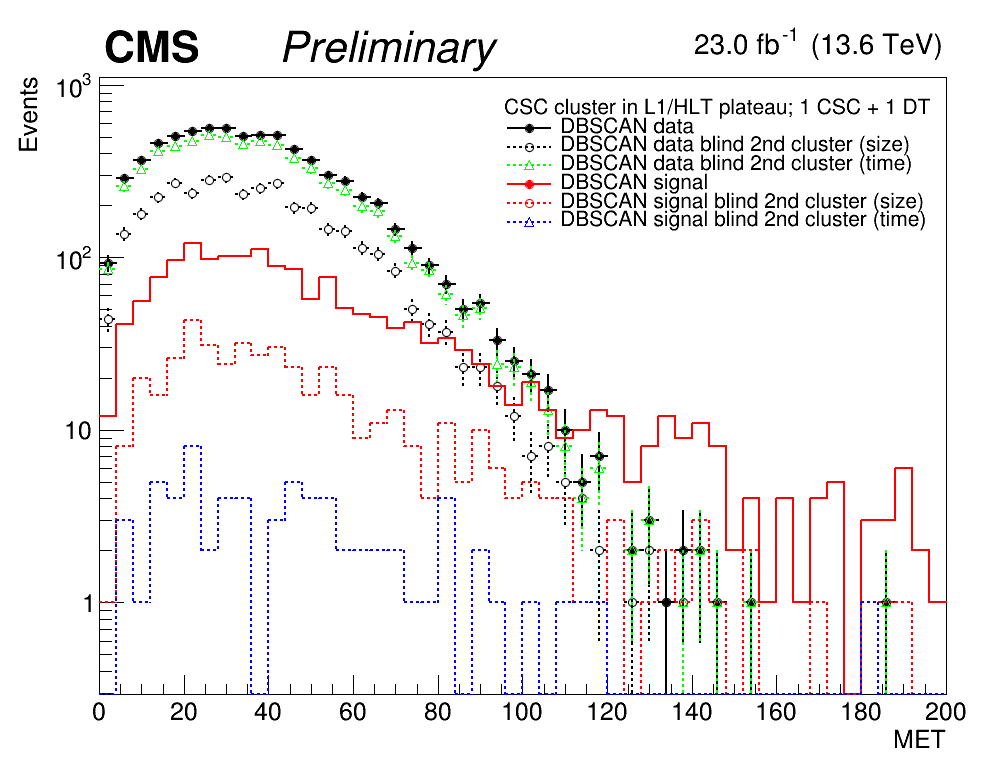

In [8]:
can = rt.TCanvas('c','c', 1000, 800)
leg = rt.TLegend(0.5,0.7,0.75,0.87)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
h0 = {}
h1 = {}
h2 = {}
can.cd()
scale=True
scale=False
for k in tree_keys:
    
    print(k)
    phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
    leg.SetHeader("CSC cluster in L1/HLT plateau"+phrase)
    cut = first_in_plateau[k]
    
    if 'signal' in k:
        cut = cut & (gen_match[k])
        print(gen_match[k][ gen_match[k]==True ].shape)
        print(gen_match[k][ gen_match[k]==False ].shape)
    
    lab = ""
    
    
    h0[k] = create_TH1D(met[k][ cut ].flatten(),title="",axis_title = ['MET','Events'], binning=[50,0,200])
    leg.AddEntry(h0[k],data_label[k])
    h0[k].SetLineColor(colors[k])
    h0[k].SetLineWidth(2)
    h0[k].SetMarkerColor(colors[k])
    h0[k].SetMarkerStyle(marker_style[k])
    h0[k].SetMarkerSize(1.2)
    if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
    
    h1[k] = create_TH1D(met[k][ cut & blind_cluster_2_size[k] ].flatten(),title="",axis_title = ['MET','Events'], binning=[50,0,200])
    leg.AddEntry(h1[k],data_label[k]+" blind 2nd cluster (size)")
    h1[k].SetLineColor(colors[k])
    h1[k].SetLineWidth(2)
    h1[k].SetLineStyle(2)
    h1[k].SetMarkerColor(colors[k])
    h1[k].SetMarkerStyle(24)
    h1[k].SetMarkerSize(1.2)
    if scale and h1[k].Integral()>0:h1[k].Scale(1./h1[k].Integral())
        
    h2[k] = create_TH1D(met[k][ cut & blind_cluster_2_time[k] ].flatten(),title="",axis_title = ['MET','Events'], binning=[50,0,200])
    leg.AddEntry(h2[k],data_label[k]+" blind 2nd cluster (time)")
    h2[k].SetLineColor(colors[k]+2)
    h2[k].SetLineWidth(2)
    h2[k].SetLineStyle(2)
    h2[k].SetMarkerColor(colors[k]+2)
    h2[k].SetMarkerStyle(26)
    h2[k].SetMarkerSize(1.2)
    if scale and h2[k].Integral()>0:h2[k].Scale(1./h2[k].Integral())
  
    h0[k].Draw('PE same' if 'data' in k else "HISTO same")        
    h1[k].Draw('PE same' if 'data' in k else "HISTO same")
    h2[k].Draw('PE same' if 'data' in k else "HISTO same")

    
leg.Draw()
can.SetRightMargin(0.05)
drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

# if setlog: 
can.SetLogy()
can.Draw()
can.Print("plots/V1p19_"+vers+"/MET_in_plateau"+lab+plot_string+".pdf")
can.Print("plots/V1p19_"+vers+"/MET_in_plateau"+lab+plot_string+".png")

## Find optimal MET cut

In [9]:
true_label = {}
met_sel = {}
for i,k in enumerate(tree_keys):
    sel = first_in_plateau[k] & blind_cluster_2_time[k] if 'data' in k else first_in_plateau[k]
    if 'signal' in k:
        sel = sel & (gen_match[k])
    true_label[k] = np.ones(sel[sel].shape) if 'signal' in k else np.zeros(sel[sel].shape)
    met_sel[k] = met[k][ sel ]

In [10]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

(8234,)
(8234,)


/afs/desy.de/user/l/lbenato/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


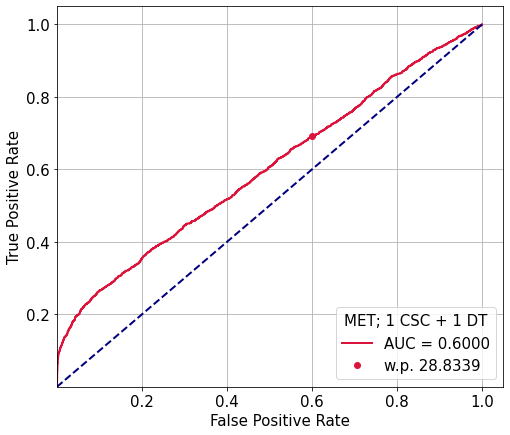

In [11]:
bkg_rejection = 0.6

y = np.concatenate((true_label['signal'],true_label['data']))
scores = np.concatenate((met_sel['signal'],met_sel['data']))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = metrics.roc_auc_score(y, scores)
idx, _ = find_nearest(fpr,bkg_rejection)




print(y.shape)
print(scores.shape)

phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
    
plt.figure(figsize=(8,7))
plt.rcParams.update({"font.size": 15}) #Larger font size                                                                                          
plt.plot(fpr, tpr, color="crimson", lw=2, label="AUC = {0:.4f}".format(AUC))
plt.plot(fpr[idx], tpr[idx],"ro",color="crimson",label="w.p. {0:.4f}".format(thresholds[idx]))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#plt.plot(fpr_L,tpr_L,"ro",color="blue",label="cut based")
plt.ylim([0.0001, 1.05])
plt.xlim([0.0001, 1.05])
#plt.xscale("log")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right", title="MET"+phrase)
plt.grid(True)
plt.savefig("plots/V1p19_"+vers+"/ROC_MET_in_plateau"+plot_string+".pdf")
plt.savefig("plots/V1p19_"+vers+"/ROC_MET_in_plateau"+plot_string+".png")

* Try to blind also by looking at OOT

### Cluster-MET dPhi distribution


In [12]:
if category==1:
    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.6,0.7,0.85,0.87)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h0 = {}
    h1 = {}
    h2 = {}
    can.cd()
    scale=True
    scale=False
    for k in tree_keys:
        
        phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
        lab = ""
        
        if 'signal' in k:
            cut = first_in_plateau[k]
        else:
            cut = first_in_plateau[k] & blind_cluster_2_time[k]
            
        if 'signal' in k:
            cut = cut & (gen_match[k])
    
        lab = "_met50"
        phrase+= "; MET>50"
        cut = cut & (met[k]>50)
        
        
        leg.SetHeader("CSC in L1 plateau"+phrase)
        
        h0[k] = create_TH1D(np.abs(cscClusterMet_dPhi[k][ cut  ][:,0].flatten()),title="",axis_title = ['|#Delta #varphi (MET, CSC cluster)|','Events'], binning=[50,0,3.2])
        leg.AddEntry(h0[k],data_label[k]+" 1st cluster")
        h0[k].SetLineColor(colors[k])
        h0[k].SetLineWidth(2)
        h0[k].SetMarkerColor(colors[k])
        h0[k].SetMarkerStyle(marker_style[k])
        h0[k].SetMarkerSize(1.2)
        if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
    
        #h[k].SetMaximum(1.5)


            
        h1[k] = create_TH1D(np.abs(cscClusterMet_dPhi[k][ cut ][:,1].flatten()),title="",axis_title = ['|#Delta #varphi (MET, CSC cluster)|','Events'], binning=[50,0,3.2])
        leg.AddEntry(h1[k],data_label[k]+" 2nd cluster" if 'signal' in k else data_label[k]+" 2nd cluster blinded")
        h1[k].SetLineColor(colors[k])
        h1[k].SetLineWidth(2)
        h1[k].SetLineStyle(2)
        h1[k].SetMarkerColor(colors[k])
        h1[k].SetMarkerStyle(24)
        h1[k].SetMarkerSize(1.2)
        if scale and h1[k].Integral()>0:h1[k].Scale(1./h1[k].Integral())
        #h[k].SetMaximum(1.5)
        #h[k].SetMinimum(0.002)
        
        if not scale:
            h0[k].SetMinimum(0.8)
            h1[k].SetMinimum(0.8)
        else:
            h0[k].SetMaximum(1)
            h1[k].SetMaximum(1)
    
        h1[k].Draw('PE same' if 'data' in k else "HISTO same")        
        h0[k].Draw('PE same' if 'data' in k else "HISTO same")

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+vers+"/CscCscClusterMet_dPhi_in_plateau"+lab+plot_string+".pdf")
    can.Print("plots/V1p19_"+vers+"/CscCscClusterMet_dPhi_in_plateau"+lab+plot_string+".png")

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

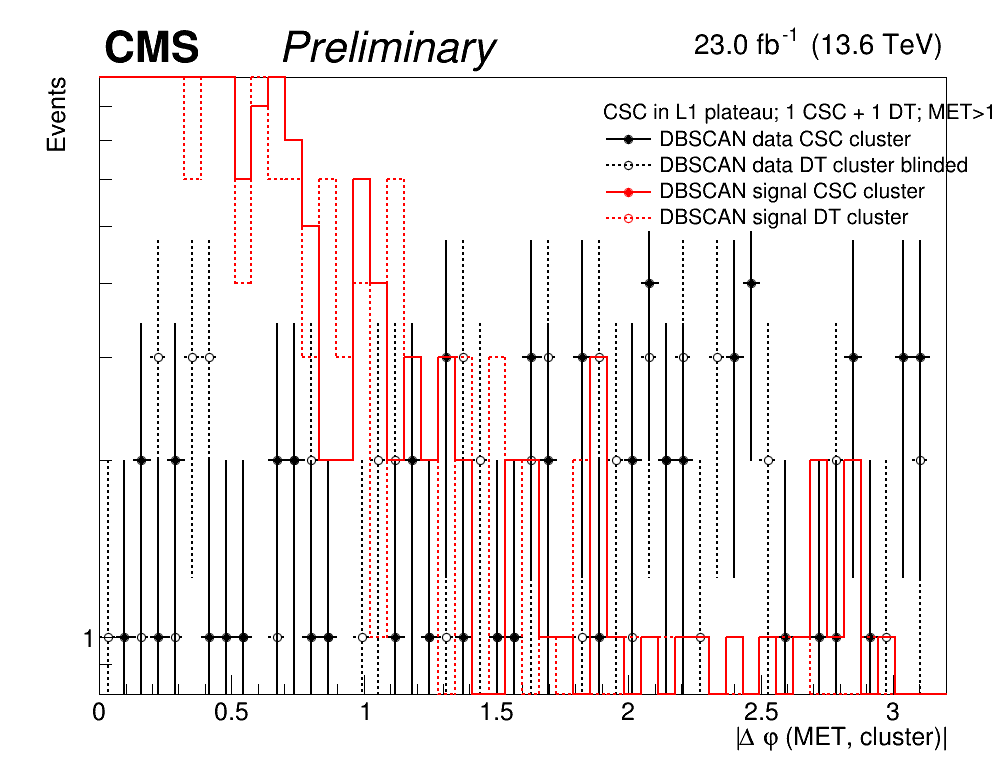

In [13]:
if category==2:
    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.6,0.7,0.85,0.87)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h0 = {}
    h1 = {}
    h2 = {}
    can.cd()
    scale=True
    scale=False
    for k in tree_keys:
        
        phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
        lab = ""
        
        if 'signal' in k:
            cut = first_in_plateau[k]
        else:
            cut = first_in_plateau[k] & blind_cluster_2_time[k]
            
        if 'signal' in k:
            cut = cut & (gen_match[k])
    
        lab = "_met100"
        phrase+= "; MET>100"
        cut = cut & (met[k]>100)
        
        
        leg.SetHeader("CSC in L1 plateau"+phrase)
        
        h0[k] = create_TH1D(np.abs(cscClusterMet_dPhi[k][ cut  ][:,0].flatten()),title="",axis_title = ['|#Delta #varphi (MET, cluster)|','Events'], binning=[50,0,3.2])
        leg.AddEntry(h0[k],data_label[k]+" CSC cluster")
        h0[k].SetLineColor(colors[k])
        h0[k].SetLineWidth(2)
        h0[k].SetMarkerColor(colors[k])
        h0[k].SetMarkerStyle(marker_style[k])
        h0[k].SetMarkerSize(1.2)
        if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
    
        #h[k].SetMaximum(1.5)


        
        h1[k] = create_TH1D(np.abs(dtClusterMet_dPhi[k][ cut ][:,0].flatten()),title="",axis_title = ['|#Delta #varphi (MET, cluster)|','Events'], binning=[50,0,3.2])
        leg.AddEntry(h1[k],data_label[k]+" DT cluster" if 'signal' in k else data_label[k]+" DT cluster blinded")
        h1[k].SetLineColor(colors[k])
        h1[k].SetLineWidth(2)
        h1[k].SetLineStyle(2)
        h1[k].SetMarkerColor(colors[k])
        h1[k].SetMarkerStyle(24)
        h1[k].SetMarkerSize(1.2)
        if scale and h1[k].Integral()>0:h1[k].Scale(1./h1[k].Integral())
        #h[k].SetMaximum(1.5)
        #h[k].SetMinimum(0.002)
        
        if not scale:
            h0[k].SetMinimum(0.8)
            h1[k].SetMinimum(0.8)
        else:
            h0[k].SetMaximum(1)
            h1[k].SetMaximum(1)
    
        h1[k].Draw('PE same' if 'data' in k else "HISTO same")        
        h0[k].Draw('PE same' if 'data' in k else "HISTO same")

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+vers+"/CscDtClusterMet_dPhi_in_plateau"+lab+plot_string+".pdf")
    can.Print("plots/V1p19_"+vers+"/CscDtClusterMet_dPhi_in_plateau"+lab+plot_string+".png")

In [14]:
true_label = {}
dphi_met_sel = {}
for i,k in enumerate(tree_keys):
    pre_cut = first_in_plateau[k] & (met[k]>50)
    sel = pre_cut & blind_cluster_2_time[k] if 'data' in k else pre_cut
    if 'signal' in k:
        sel = sel & (gen_match[k])
    true_label[k] = np.ones(sel[sel].shape) if 'signal' in k else np.zeros(sel[sel].shape)
    if category==1:
        dphi_met_sel[k] = np.maximum( np.abs(cscClusterMet_dPhi[k][ sel  ][:,0]).flatten() , np.abs(cscClusterMet_dPhi[k][ sel  ][:,1]).flatten() )
    elif category==2:
        dphi_met_sel[k] = np.maximum( np.abs(cscClusterMet_dPhi[k][ sel  ][:,0]).flatten() , np.abs(dtClusterMet_dPhi[k][ sel  ][:,0]).flatten() )

(2312,)
(2312,)
Written plots/V1p19_v6/ROC_DPhi_MET_in_plateau_met50_csc_dt_cluster_ME_MB_veto.pdf


/afs/desy.de/user/l/lbenato/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


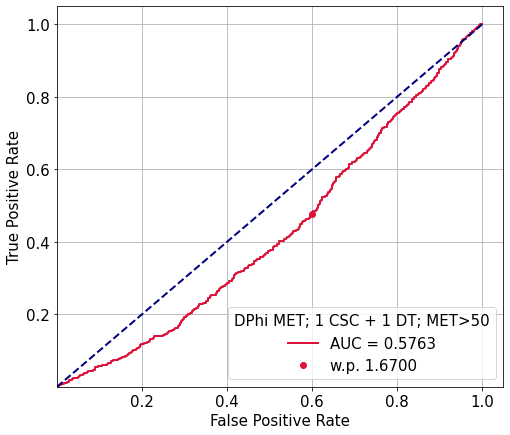

In [15]:
bkg_rejection = 0.6

y = np.concatenate((true_label['signal'],true_label['data']))
scores = np.concatenate((dphi_met_sel['signal'],dphi_met_sel['data']))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = metrics.roc_auc_score(y, scores)
idx, _ = find_nearest(fpr,bkg_rejection)


print(y.shape)
print(scores.shape)


phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"

lab = ""
lab += "_met50"
phrase+= "; MET>50"

plt.figure(figsize=(8,7))
plt.rcParams.update({"font.size": 15}) #Larger font size                                                                                          
plt.plot(fpr, tpr, color="crimson", lw=2, label="AUC = {0:.4f}".format(AUC if AUC>0.5 else 1-AUC) )
plt.plot(fpr[idx], tpr[idx],"ro",color="crimson",label="w.p. {0:.4f}".format(thresholds[idx]))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#plt.plot(fpr_L,tpr_L,"ro",color="blue",label="cut based")
plt.ylim([0.0001, 1.05])
plt.xlim([0.0001, 1.05])
#plt.xscale("log")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right", title="DPhi MET"+phrase)
plt.grid(True)
plt.savefig("plots/V1p19_"+vers+"/ROC_DPhi_MET_in_plateau"+lab+plot_string+".pdf")
plt.savefig("plots/V1p19_"+vers+"/ROC_DPhi_MET_in_plateau"+lab+plot_string+".png")
print("Written "+"plots/V1p19_"+vers+"/ROC_DPhi_MET_in_plateau"+lab+plot_string+".pdf")

## Clusters dR

In [16]:
if category==1:
    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.6-0.45,0.7,0.85-0.45,0.87)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h0 = {}
    h1 = {}
    h2 = {}
    can.cd()
    scale=True
    scale=False
    for k in tree_keys:
        
        phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
        lab = ""
        
        if 'signal' in k:
            cut = first_in_plateau[k]
        else:
            cut = first_in_plateau[k] & blind_cluster_2_time[k]
    
        #lab = "_met50"
        #phrase+= "; MET>50"
        #cut = cut & (met[k]>50)
        
        if 'signal' in k:
            cut = cut & (gen_match[k])
        
        leg.SetHeader("CSC in L1 plateau"+phrase)
        
        tmp_csc_eta = cscClusterEta[k][ cut ][:,0].flatten()
        tmp_csc_phi = cscClusterPhi[k][ cut ][:,0].flatten()
        tmp_dt_eta = cscClusterEta[k][ cut ][:,1].flatten()
        tmp_dt_phi = cscClusterPhi[k][ cut ][:,1].flatten()
        dR = deltaR(tmp_csc_eta, tmp_csc_phi, tmp_dt_eta, tmp_dt_phi)
        
        h0[k] = create_TH1D(dR,title="",axis_title = ['|#Delta R (CSC, CSC cluster)|','Events'], binning=[60,0,6])
        leg.AddEntry(h0[k],data_label[k])#+" 1st cluster")
        h0[k].SetLineColor(colors[k])
        h0[k].SetLineWidth(2)
        h0[k].SetMarkerColor(colors[k])
        h0[k].SetMarkerStyle(marker_style[k])
        h0[k].SetMarkerSize(1.2)
        if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
        
        if not scale:
            h0[k].SetMinimum(0.8)
            #h1[k].SetMinimum(0.8)
        else:
            h0[k].SetMaximum(1)
            #h1[k].SetMaximum(1)
    
        #h1[k].Draw('PE same' if 'data' in k else "HISTO same")        
        h0[k].Draw('PE same' if 'data' in k else "HISTO same")

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+vers+"/CscCscCluster_dR_in_plateau"+lab+plot_string+".pdf")
    can.Print("plots/V1p19_"+vers+"/CscCscCluster_dR_in_plateau"+lab+plot_string+".png")

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

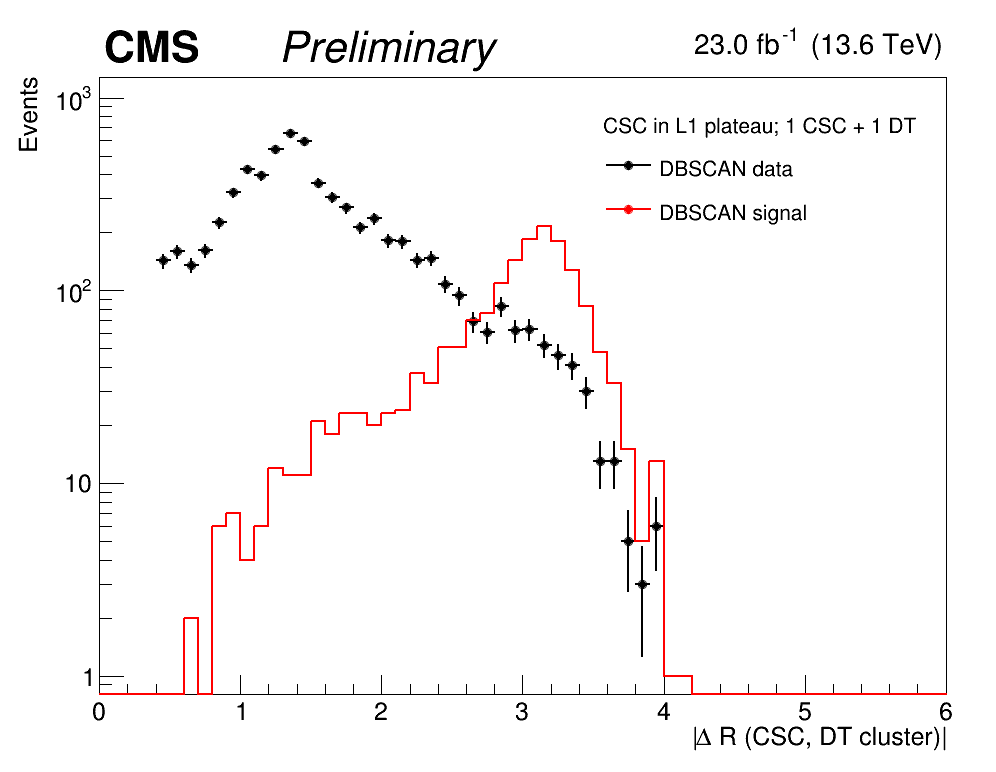

In [17]:
if category==2:
    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.6,0.7,0.85,0.87)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h0 = {}
    h1 = {}
    h2 = {}
    can.cd()
    scale=True
    scale=False
    for k in tree_keys:
        
        phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
        lab = ""
        
        if 'signal' in k:
            cut = first_in_plateau[k]
        else:
            cut = first_in_plateau[k] & blind_cluster_2_time[k]
    
        if 'signal' in k:
            cut = cut & (gen_match[k])
        #lab = "_met50"
        #phrase+= "; MET>50"
        #cut = cut & (met[k]>50)
        
        
        leg.SetHeader("CSC in L1 plateau"+phrase)
        
        tmp_csc_eta = cscClusterEta[k][ cut ][:,0].flatten()
        tmp_csc_phi = cscClusterPhi[k][ cut ][:,0].flatten()
        tmp_dt_eta = dtClusterEta[k][ cut ][:,0].flatten()
        tmp_dt_phi = dtClusterPhi[k][ cut ][:,0].flatten()
        dR = deltaR(tmp_csc_eta, tmp_csc_phi, tmp_dt_eta, tmp_dt_phi)
        
        h0[k] = create_TH1D(dR,title="",axis_title = ['|#Delta R (CSC, DT cluster)|','Events'], binning=[60,0,6])
        leg.AddEntry(h0[k],data_label[k])#+" 1st cluster")
        h0[k].SetLineColor(colors[k])
        h0[k].SetLineWidth(2)
        h0[k].SetMarkerColor(colors[k])
        h0[k].SetMarkerStyle(marker_style[k])
        h0[k].SetMarkerSize(1.2)
        if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
        
        if not scale:
            h0[k].SetMinimum(0.8)
            #h1[k].SetMinimum(0.8)
        else:
            h0[k].SetMaximum(1)
            #h1[k].SetMaximum(1)
    
        #h1[k].Draw('PE same' if 'data' in k else "HISTO same")        
        h0[k].Draw('PE same' if 'data' in k else "HISTO same")

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+vers+"/CscDtCluster_dR_in_plateau"+lab+plot_string+".pdf")
    can.Print("plots/V1p19_"+vers+"/CscDtCluster_dR_in_plateau"+lab+plot_string+".png")

In [18]:
true_label = {}
dR_sel = {}
for i,k in enumerate(tree_keys):
    pre_cut = first_in_plateau[k]
    sel = pre_cut & blind_cluster_2_time[k] if 'data' in k else pre_cut
    if 'signal' in k:
        sel = sel & (gen_match[k] == True)
    true_label[k] = np.ones(sel[sel].shape) if 'signal' in k else np.zeros(sel[sel].shape)
    tmp_csc_eta = cscClusterEta[k][ sel ][:,0].flatten()
    tmp_csc_phi = cscClusterPhi[k][ sel ][:,0].flatten()
    if category==1:
        tmp_dt_eta = cscClusterEta[k][ sel ][:,1].flatten()
        tmp_dt_phi = cscClusterPhi[k][ sel ][:,1].flatten()
    else:
        tmp_dt_eta = dtClusterEta[k][ sel ][:,0].flatten()
        tmp_dt_phi = dtClusterPhi[k][ sel ][:,0].flatten()
    dR_sel[k] = deltaR(tmp_csc_eta, tmp_csc_phi, tmp_dt_eta, tmp_dt_phi)

(8234,)
(8234,)


/afs/desy.de/user/l/lbenato/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


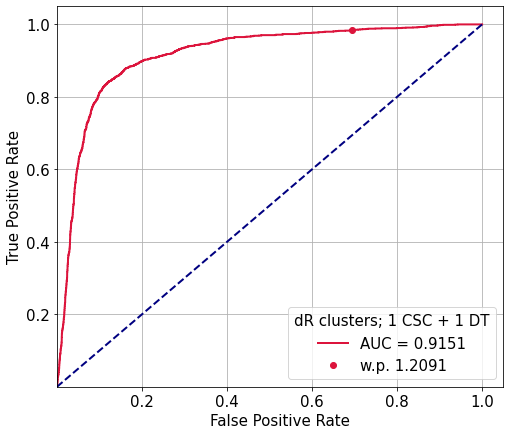

In [19]:
bkg_rejection = 0.7

y = np.concatenate((true_label['signal'],true_label['data']))
scores = np.concatenate((dR_sel['signal'],dR_sel['data']))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = metrics.roc_auc_score(y, scores)
idx, _ = find_nearest(fpr,bkg_rejection)


print(y.shape)
print(scores.shape)

phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"

lab = ""
#plot_string += "_met100"
#phrase+= "; MET>100"

plt.figure(figsize=(8,7))
plt.rcParams.update({"font.size": 15}) #Larger font size                                                                                          
plt.plot(fpr, tpr, color="crimson", lw=2, label="AUC = {0:.4f}".format(AUC if AUC>0.5 else 1-AUC) )
plt.plot(fpr[idx], tpr[idx],"ro",color="crimson",label="w.p. {0:.4f}".format(thresholds[idx]))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#plt.plot(fpr_L,tpr_L,"ro",color="blue",label="cut based")
plt.ylim([0.0001, 1.05])
plt.xlim([0.0001, 1.05])
#plt.xscale("log")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right", title="dR clusters"+phrase)
plt.grid(True)
plt.savefig("plots/V1p19_"+vers+"/ROC_dR_in_plateau"+lab+plot_string+".pdf")
plt.savefig("plots/V1p19_"+vers+"/ROC_dR_in_plateau"+lab+plot_string+".png")

## Clusters dPhi

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to spe

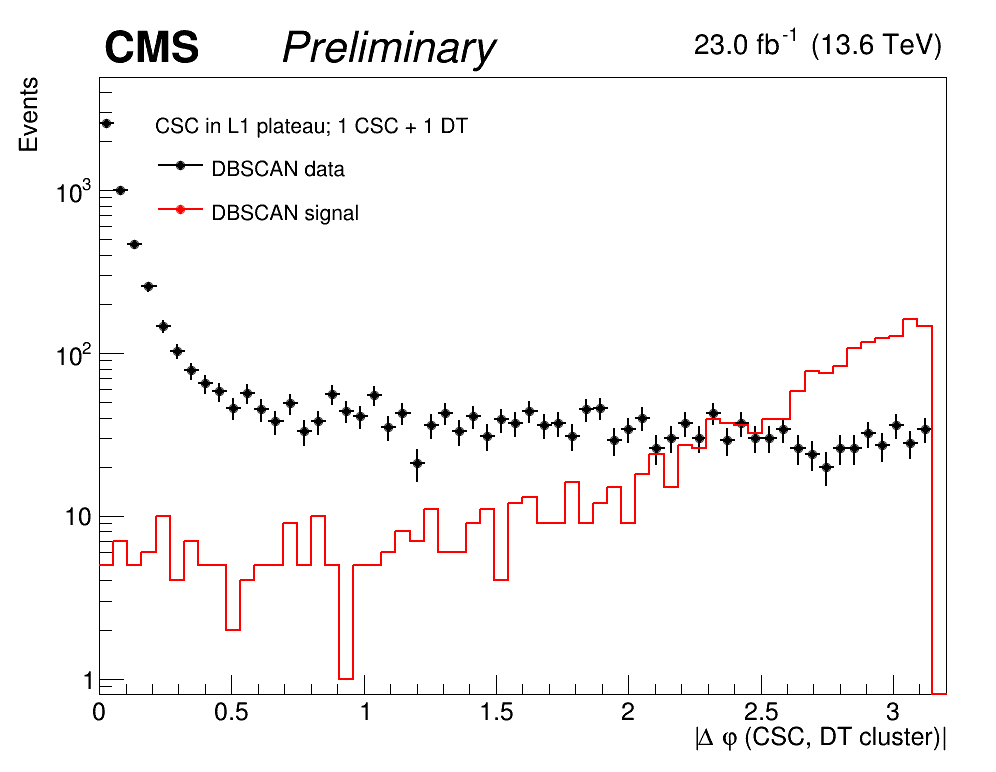

In [20]:
if category==1 or category==2:
    can = rt.TCanvas('c','c', 1000, 800)
    leg = rt.TLegend(0.6-0.45,0.7,0.85-0.45,0.87)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    h0 = {}
    h1 = {}
    h2 = {}
    can.cd()
    scale=True
    scale=False
    for k in tree_keys:
        
        phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"
        second = "CSC" if category==1 else "DT"
        name = "Csc" if category==1 else "Dt"
        lab = ""
        
        if 'signal' in k:
            cut = first_in_plateau[k]
        else:
            cut = first_in_plateau[k] & blind_cluster_2_time[k]
    
        #lab = "_met50"
        #phrase+= "; MET>50"
        #cut = cut & (met[k]>50)
        
        if 'signal' in k:
            cut = cut & (gen_match[k])
        
        leg.SetHeader("CSC in L1 plateau"+phrase)
        
        tmp_csc_eta = cscClusterEta[k][ cut ][:,0].flatten()
        tmp_csc_phi = cscClusterPhi[k][ cut ][:,0].flatten()
        if category==2:
            tmp_dt_eta = dtClusterEta[k][ cut ][:,0].flatten()
            tmp_dt_phi = dtClusterPhi[k][ cut ][:,0].flatten()
        else:
            tmp_dt_eta = cscClusterEta[k][ cut ][:,1].flatten()
            tmp_dt_phi = cscClusterPhi[k][ cut ][:,1].flatten()
        dPhi = np.abs(deltaPhi(tmp_csc_phi, tmp_dt_phi))
        
        h0[k] = create_TH1D(dPhi,title="",axis_title = ['|#Delta #varphi (CSC, '+second+' cluster)|','Events'], binning=[60,0,3.2])
        leg.AddEntry(h0[k],data_label[k])#+" 1st cluster")
        h0[k].SetLineColor(colors[k])
        h0[k].SetLineWidth(2)
        h0[k].SetMarkerColor(colors[k])
        h0[k].SetMarkerStyle(marker_style[k])
        h0[k].SetMarkerSize(1.2)
        if scale and h0[k].Integral()>0:h0[k].Scale(1./h0[k].Integral())
        
        if not scale:
            h0[k].SetMinimum(0.8)
            #h1[k].SetMinimum(0.8)
        else:
            h0[k].SetMaximum(1)
            #h1[k].SetMaximum(1)
    
        #h1[k].Draw('PE same' if 'data' in k else "HISTO same")        
        h0[k].Draw('PE same' if 'data' in k else "HISTO same")

    
    leg.Draw()
    can.SetRightMargin(0.05)
    drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)

    # if setlog: 
    can.SetLogy()
    can.Draw()
    can.Print("plots/V1p19_"+vers+"/Csc"+name+"Cluster_dPhi_in_plateau"+lab+plot_string+".pdf")
    can.Print("plots/V1p19_"+vers+"/Csc"+name+"Cluster_dPhi_in_plateau"+lab+plot_string+".png")

In [21]:
true_label = {}
dPhi_sel = {}
for i,k in enumerate(tree_keys):
    pre_cut = first_in_plateau[k]
    sel = pre_cut & blind_cluster_2_time[k] if 'data' in k else pre_cut
    if 'signal' in k:
        sel = sel & (gen_match[k] == True)
    true_label[k] = np.ones(sel[sel].shape) if 'signal' in k else np.zeros(sel[sel].shape)
    tmp_csc_eta = cscClusterEta[k][ sel ][:,0].flatten()
    tmp_csc_phi = cscClusterPhi[k][ sel ][:,0].flatten()
    if category==1:
        tmp_dt_eta = cscClusterEta[k][ sel ][:,1].flatten()
        tmp_dt_phi = cscClusterPhi[k][ sel ][:,1].flatten()
    else:
        tmp_dt_eta = dtClusterEta[k][ sel ][:,0].flatten()
        tmp_dt_phi = dtClusterPhi[k][ sel ][:,0].flatten()
    dPhi_sel[k] = np.abs(deltaPhi(tmp_csc_phi, tmp_dt_phi))

(8234,)
(8234,)


/afs/desy.de/user/l/lbenato/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.


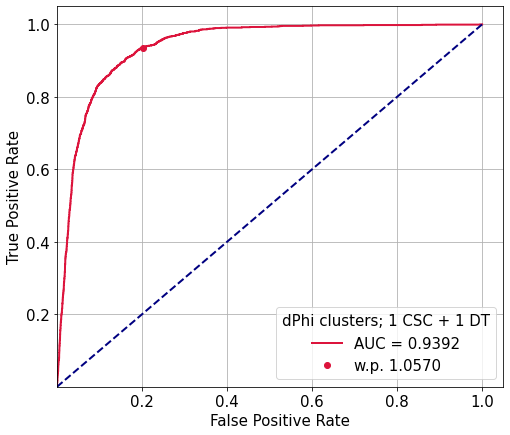

In [22]:
bkg_rejection = 0.2

y = np.concatenate((true_label['signal'],true_label['data']))
scores = np.concatenate((dPhi_sel['signal'],dPhi_sel['data']))
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
AUC = metrics.roc_auc_score(y, scores)
idx, _ = find_nearest(fpr,bkg_rejection)


print(y.shape)
print(scores.shape)

phrase = "; 2 CSC" if category==1 else "; 1 CSC + 1 DT"

lab = ""
#plot_string += "_met100"
#phrase+= "; MET>100"

plt.figure(figsize=(8,7))
plt.rcParams.update({"font.size": 15}) #Larger font size                                                                                          
plt.plot(fpr, tpr, color="crimson", lw=2, label="AUC = {0:.4f}".format(AUC if AUC>0.5 else 1-AUC) )
plt.plot(fpr[idx], tpr[idx],"ro",color="crimson",label="w.p. {0:.4f}".format(thresholds[idx]))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
#plt.plot(fpr_L,tpr_L,"ro",color="blue",label="cut based")
plt.ylim([0.0001, 1.05])
plt.xlim([0.0001, 1.05])
#plt.xscale("log")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right", title="dPhi clusters"+phrase)
plt.grid(True)
plt.savefig("plots/V1p19_"+vers+"/ROC_dPhi_in_plateau"+lab+plot_string+".pdf")
plt.savefig("plots/V1p19_"+vers+"/ROC_dPhi_in_plateau"+lab+plot_string+".png")